## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.91159 | train_mse: 2.17839 | train_mae: 0.97705 |  0:00:00s


epoch 1  | loss: 1.03338 | train_mse: 1.43521 | train_mae: 0.80043 |  0:00:00s


epoch 2  | loss: 0.80865 | train_mse: 0.95569 | train_mae: 0.72629 |  0:00:01s


epoch 3  | loss: 0.62446 | train_mse: 0.62578 | train_mae: 0.5668  |  0:00:01s


epoch 4  | loss: 0.5791  | train_mse: 0.59389 | train_mae: 0.53932 |  0:00:01s


epoch 5  | loss: 0.5009  | train_mse: 0.51904 | train_mae: 0.47244 |  0:00:01s


epoch 6  | loss: 0.47272 | train_mse: 0.45923 | train_mae: 0.45716 |  0:00:02s


epoch 7  | loss: 0.43787 | train_mse: 0.37973 | train_mae: 0.42771 |  0:00:02s


epoch 8  | loss: 0.36812 | train_mse: 0.30563 | train_mae: 0.38985 |  0:00:02s


epoch 9  | loss: 0.31125 | train_mse: 0.20958 | train_mae: 0.30845 |  0:00:03s


epoch 10 | loss: 0.32414 | train_mse: 0.21838 | train_mae: 0.30222 |  0:00:03s


epoch 11 | loss: 0.27373 | train_mse: 0.27428 | train_mae: 0.3347  |  0:00:03s


epoch 12 | loss: 0.25872 | train_mse: 0.2222  | train_mae: 0.3027  |  0:00:03s


epoch 13 | loss: 0.3471  | train_mse: 0.27182 | train_mae: 0.3386  |  0:00:04s


epoch 14 | loss: 0.24958 | train_mse: 0.35989 | train_mae: 0.38051 |  0:00:04s


epoch 15 | loss: 0.29525 | train_mse: 0.2348  | train_mae: 0.32048 |  0:00:04s


epoch 16 | loss: 0.22989 | train_mse: 0.21827 | train_mae: 0.29614 |  0:00:05s


epoch 17 | loss: 0.31182 | train_mse: 0.18441 | train_mae: 0.28635 |  0:00:05s


epoch 18 | loss: 0.26478 | train_mse: 0.18524 | train_mae: 0.28544 |  0:00:05s


epoch 19 | loss: 0.24202 | train_mse: 0.19434 | train_mae: 0.28379 |  0:00:06s


epoch 20 | loss: 0.22781 | train_mse: 0.18591 | train_mae: 0.30329 |  0:00:06s


epoch 21 | loss: 0.20596 | train_mse: 0.19795 | train_mae: 0.28844 |  0:00:06s


epoch 22 | loss: 0.215   | train_mse: 0.19113 | train_mae: 0.29717 |  0:00:06s


epoch 23 | loss: 0.23848 | train_mse: 0.21027 | train_mae: 0.31789 |  0:00:07s


epoch 24 | loss: 0.22531 | train_mse: 0.17203 | train_mae: 0.27932 |  0:00:07s


epoch 25 | loss: 0.19457 | train_mse: 0.20826 | train_mae: 0.29196 |  0:00:07s


epoch 26 | loss: 0.19867 | train_mse: 0.17304 | train_mae: 0.28274 |  0:00:08s


epoch 27 | loss: 0.2358  | train_mse: 0.15459 | train_mae: 0.26472 |  0:00:08s


epoch 28 | loss: 0.19005 | train_mse: 0.13226 | train_mae: 0.24727 |  0:00:08s


epoch 29 | loss: 0.21129 | train_mse: 0.16808 | train_mae: 0.26367 |  0:00:08s


epoch 30 | loss: 0.1812  | train_mse: 0.17138 | train_mae: 0.28564 |  0:00:09s


epoch 31 | loss: 0.20903 | train_mse: 0.19171 | train_mae: 0.30478 |  0:00:09s


epoch 32 | loss: 0.19832 | train_mse: 0.16604 | train_mae: 0.27182 |  0:00:09s


epoch 33 | loss: 0.23208 | train_mse: 0.16186 | train_mae: 0.27847 |  0:00:10s


epoch 34 | loss: 0.22823 | train_mse: 0.13692 | train_mae: 0.26116 |  0:00:10s


epoch 35 | loss: 0.15846 | train_mse: 0.13895 | train_mae: 0.26859 |  0:00:10s


epoch 36 | loss: 0.15654 | train_mse: 0.14572 | train_mae: 0.27319 |  0:00:11s


epoch 37 | loss: 0.22104 | train_mse: 0.16418 | train_mae: 0.28565 |  0:00:11s


epoch 38 | loss: 0.20332 | train_mse: 0.14184 | train_mae: 0.26672 |  0:00:11s


epoch 39 | loss: 0.18554 | train_mse: 0.12739 | train_mae: 0.25148 |  0:00:11s


epoch 40 | loss: 0.17624 | train_mse: 0.1131  | train_mae: 0.24358 |  0:00:12s


epoch 41 | loss: 0.17704 | train_mse: 0.1022  | train_mae: 0.23314 |  0:00:12s


epoch 42 | loss: 0.17122 | train_mse: 0.10821 | train_mae: 0.23057 |  0:00:12s


epoch 43 | loss: 0.17671 | train_mse: 0.11642 | train_mae: 0.24459 |  0:00:13s


epoch 44 | loss: 0.18706 | train_mse: 0.13066 | train_mae: 0.25543 |  0:00:13s


epoch 45 | loss: 0.15691 | train_mse: 0.11909 | train_mae: 0.2441  |  0:00:13s


epoch 46 | loss: 0.14561 | train_mse: 0.09408 | train_mae: 0.21948 |  0:00:13s


epoch 47 | loss: 0.15589 | train_mse: 0.10486 | train_mae: 0.22499 |  0:00:14s


epoch 48 | loss: 0.18893 | train_mse: 0.1137  | train_mae: 0.23172 |  0:00:14s


epoch 49 | loss: 0.17901 | train_mse: 0.11007 | train_mae: 0.23659 |  0:00:14s


epoch 50 | loss: 0.15444 | train_mse: 0.11522 | train_mae: 0.23614 |  0:00:15s


epoch 51 | loss: 0.25138 | train_mse: 0.15862 | train_mae: 0.27542 |  0:00:15s


epoch 52 | loss: 0.18785 | train_mse: 0.10689 | train_mae: 0.23907 |  0:00:15s


epoch 53 | loss: 0.14842 | train_mse: 0.10466 | train_mae: 0.23457 |  0:00:16s


epoch 54 | loss: 0.15293 | train_mse: 0.10969 | train_mae: 0.2435  |  0:00:16s


epoch 55 | loss: 0.14546 | train_mse: 0.11849 | train_mae: 0.25223 |  0:00:16s


epoch 56 | loss: 0.16775 | train_mse: 0.11522 | train_mae: 0.23998 |  0:00:16s


epoch 57 | loss: 0.17417 | train_mse: 0.10844 | train_mae: 0.22385 |  0:00:17s


epoch 58 | loss: 0.14433 | train_mse: 0.11151 | train_mae: 0.2325  |  0:00:17s


epoch 59 | loss: 0.18433 | train_mse: 0.1316  | train_mae: 0.24271 |  0:00:17s


epoch 60 | loss: 0.1685  | train_mse: 0.11726 | train_mae: 0.23193 |  0:00:18s


epoch 61 | loss: 0.15187 | train_mse: 0.08646 | train_mae: 0.2096  |  0:00:18s


epoch 62 | loss: 0.16957 | train_mse: 0.08964 | train_mae: 0.20712 |  0:00:18s


epoch 63 | loss: 0.16455 | train_mse: 0.09167 | train_mae: 0.22164 |  0:00:19s


epoch 64 | loss: 0.15919 | train_mse: 0.09862 | train_mae: 0.21934 |  0:00:19s


epoch 65 | loss: 0.16655 | train_mse: 0.10006 | train_mae: 0.22659 |  0:00:19s


epoch 66 | loss: 0.13897 | train_mse: 0.0857  | train_mae: 0.20582 |  0:00:19s


epoch 67 | loss: 0.14874 | train_mse: 0.08632 | train_mae: 0.20872 |  0:00:20s


epoch 68 | loss: 0.14281 | train_mse: 0.08345 | train_mae: 0.20442 |  0:00:20s


epoch 69 | loss: 0.15689 | train_mse: 0.08546 | train_mae: 0.20998 |  0:00:20s


epoch 70 | loss: 0.16456 | train_mse: 0.09319 | train_mae: 0.21565 |  0:00:21s


epoch 71 | loss: 0.16242 | train_mse: 0.08336 | train_mae: 0.2113  |  0:00:21s


epoch 72 | loss: 0.16452 | train_mse: 0.11399 | train_mae: 0.23079 |  0:00:21s


epoch 73 | loss: 0.18293 | train_mse: 0.07756 | train_mae: 0.20092 |  0:00:22s


epoch 74 | loss: 0.17225 | train_mse: 0.10133 | train_mae: 0.22419 |  0:00:22s


epoch 75 | loss: 0.13639 | train_mse: 0.08893 | train_mae: 0.2072  |  0:00:22s


epoch 76 | loss: 0.13788 | train_mse: 0.10417 | train_mae: 0.22609 |  0:00:22s


epoch 77 | loss: 0.13158 | train_mse: 0.09366 | train_mae: 0.21495 |  0:00:23s


epoch 78 | loss: 0.15667 | train_mse: 0.10679 | train_mae: 0.22918 |  0:00:23s


epoch 79 | loss: 0.20547 | train_mse: 0.13125 | train_mae: 0.25017 |  0:00:23s


epoch 80 | loss: 0.18633 | train_mse: 0.10353 | train_mae: 0.23194 |  0:00:24s


epoch 81 | loss: 0.16114 | train_mse: 0.10504 | train_mae: 0.22766 |  0:00:24s


epoch 82 | loss: 0.1937  | train_mse: 0.10604 | train_mae: 0.23242 |  0:00:24s


epoch 83 | loss: 0.14927 | train_mse: 0.0902  | train_mae: 0.21422 |  0:00:24s


epoch 84 | loss: 0.17088 | train_mse: 0.07322 | train_mae: 0.19575 |  0:00:25s


epoch 85 | loss: 0.1727  | train_mse: 0.07541 | train_mae: 0.20069 |  0:00:25s


epoch 86 | loss: 0.1372  | train_mse: 0.0757  | train_mae: 0.19539 |  0:00:25s


epoch 87 | loss: 0.18165 | train_mse: 0.10499 | train_mae: 0.2364  |  0:00:26s


epoch 88 | loss: 0.16859 | train_mse: 0.08101 | train_mae: 0.21248 |  0:00:26s


epoch 89 | loss: 0.1386  | train_mse: 0.08147 | train_mae: 0.2065  |  0:00:26s


epoch 90 | loss: 0.1324  | train_mse: 0.09395 | train_mae: 0.21432 |  0:00:26s


epoch 91 | loss: 0.17604 | train_mse: 0.12458 | train_mae: 0.23041 |  0:00:27s


epoch 92 | loss: 0.22455 | train_mse: 0.13875 | train_mae: 0.25919 |  0:00:27s


epoch 93 | loss: 0.15897 | train_mse: 0.07328 | train_mae: 0.19961 |  0:00:27s


epoch 94 | loss: 0.13406 | train_mse: 0.07151 | train_mae: 0.19489 |  0:00:28s


epoch 95 | loss: 0.15161 | train_mse: 0.07861 | train_mae: 0.20328 |  0:00:28s


epoch 96 | loss: 0.15378 | train_mse: 0.08421 | train_mae: 0.2122  |  0:00:28s


epoch 97 | loss: 0.13257 | train_mse: 0.08167 | train_mae: 0.20613 |  0:00:28s


epoch 98 | loss: 0.13794 | train_mse: 0.07608 | train_mae: 0.20111 |  0:00:29s


epoch 99 | loss: 0.17463 | train_mse: 0.08688 | train_mae: 0.20817 |  0:00:29s


epoch 100| loss: 0.15658 | train_mse: 0.08763 | train_mae: 0.21023 |  0:00:29s


epoch 101| loss: 0.14241 | train_mse: 0.08702 | train_mae: 0.20593 |  0:00:30s


epoch 102| loss: 0.16185 | train_mse: 0.09412 | train_mae: 0.21623 |  0:00:30s


epoch 103| loss: 0.13835 | train_mse: 0.07526 | train_mae: 0.20206 |  0:00:30s


epoch 104| loss: 0.13073 | train_mse: 0.07777 | train_mae: 0.20704 |  0:00:30s


epoch 105| loss: 0.14296 | train_mse: 0.07881 | train_mae: 0.19973 |  0:00:31s


epoch 106| loss: 0.14566 | train_mse: 0.08327 | train_mae: 0.21094 |  0:00:31s


epoch 107| loss: 0.11984 | train_mse: 0.07312 | train_mae: 0.19197 |  0:00:31s


epoch 108| loss: 0.18171 | train_mse: 0.0734  | train_mae: 0.19777 |  0:00:32s


epoch 109| loss: 0.12878 | train_mse: 0.07674 | train_mae: 0.20395 |  0:00:32s


epoch 110| loss: 0.10054 | train_mse: 0.06216 | train_mae: 0.18641 |  0:00:32s


epoch 111| loss: 0.14631 | train_mse: 0.06594 | train_mae: 0.18639 |  0:00:33s


epoch 112| loss: 0.18438 | train_mse: 0.0879  | train_mae: 0.2111  |  0:00:33s


epoch 113| loss: 0.13936 | train_mse: 0.07052 | train_mae: 0.19621 |  0:00:33s


epoch 114| loss: 0.12099 | train_mse: 0.06528 | train_mae: 0.18808 |  0:00:33s


epoch 115| loss: 0.14222 | train_mse: 0.06712 | train_mae: 0.18977 |  0:00:34s


epoch 116| loss: 0.12031 | train_mse: 0.06931 | train_mae: 0.19595 |  0:00:34s


epoch 117| loss: 0.0907  | train_mse: 0.06528 | train_mae: 0.19368 |  0:00:34s


epoch 118| loss: 0.11542 | train_mse: 0.06254 | train_mae: 0.18669 |  0:00:35s


epoch 119| loss: 0.11003 | train_mse: 0.06427 | train_mae: 0.18416 |  0:00:35s


epoch 120| loss: 0.12991 | train_mse: 0.0536  | train_mae: 0.17308 |  0:00:35s


epoch 121| loss: 0.13619 | train_mse: 0.05441 | train_mae: 0.17492 |  0:00:35s


epoch 122| loss: 0.11454 | train_mse: 0.05707 | train_mae: 0.17542 |  0:00:36s


epoch 123| loss: 0.13799 | train_mse: 0.07355 | train_mae: 0.20519 |  0:00:36s


epoch 124| loss: 0.14218 | train_mse: 0.05988 | train_mae: 0.18344 |  0:00:36s


epoch 125| loss: 0.14368 | train_mse: 0.09542 | train_mae: 0.23029 |  0:00:37s


epoch 126| loss: 0.14462 | train_mse: 0.06835 | train_mae: 0.19142 |  0:00:37s


epoch 127| loss: 0.14213 | train_mse: 0.07563 | train_mae: 0.19364 |  0:00:37s


epoch 128| loss: 0.12234 | train_mse: 0.06662 | train_mae: 0.19633 |  0:00:37s


epoch 129| loss: 0.13531 | train_mse: 0.05759 | train_mae: 0.18239 |  0:00:38s


epoch 130| loss: 0.10792 | train_mse: 0.05319 | train_mae: 0.17504 |  0:00:38s


epoch 131| loss: 0.15655 | train_mse: 0.06138 | train_mae: 0.18783 |  0:00:38s


epoch 132| loss: 0.12161 | train_mse: 0.06442 | train_mae: 0.18959 |  0:00:39s


epoch 133| loss: 0.11774 | train_mse: 0.06425 | train_mae: 0.186   |  0:00:39s


epoch 134| loss: 0.11214 | train_mse: 0.0725  | train_mae: 0.19602 |  0:00:39s


epoch 135| loss: 0.13873 | train_mse: 0.06499 | train_mae: 0.18773 |  0:00:40s


epoch 136| loss: 0.14617 | train_mse: 0.06084 | train_mae: 0.18057 |  0:00:40s


epoch 137| loss: 0.14943 | train_mse: 0.06741 | train_mae: 0.19112 |  0:00:40s


epoch 138| loss: 0.13246 | train_mse: 0.05653 | train_mae: 0.176   |  0:00:40s


epoch 139| loss: 0.09955 | train_mse: 0.05686 | train_mae: 0.17473 |  0:00:41s


epoch 140| loss: 0.10804 | train_mse: 0.05256 | train_mae: 0.16906 |  0:00:41s


epoch 141| loss: 0.12218 | train_mse: 0.07973 | train_mae: 0.20539 |  0:00:41s


epoch 142| loss: 0.20293 | train_mse: 0.07084 | train_mae: 0.18406 |  0:00:42s


epoch 143| loss: 0.14613 | train_mse: 0.09372 | train_mae: 0.21488 |  0:00:42s


epoch 144| loss: 0.14605 | train_mse: 0.06017 | train_mae: 0.18062 |  0:00:42s


epoch 145| loss: 0.12856 | train_mse: 0.06446 | train_mae: 0.18819 |  0:00:42s


epoch 146| loss: 0.09958 | train_mse: 0.07648 | train_mae: 0.19549 |  0:00:43s


epoch 147| loss: 0.11557 | train_mse: 0.05618 | train_mae: 0.17538 |  0:00:43s


epoch 148| loss: 0.1162  | train_mse: 0.07631 | train_mae: 0.21061 |  0:00:43s


epoch 149| loss: 0.11482 | train_mse: 0.05929 | train_mae: 0.18495 |  0:00:44s


epoch 150| loss: 0.10668 | train_mse: 0.05515 | train_mae: 0.17499 |  0:00:44s


epoch 151| loss: 0.10581 | train_mse: 0.06225 | train_mae: 0.18364 |  0:00:44s


epoch 152| loss: 0.0996  | train_mse: 0.06571 | train_mae: 0.18104 |  0:00:44s


epoch 153| loss: 0.12909 | train_mse: 0.08246 | train_mae: 0.20911 |  0:00:45s


epoch 154| loss: 0.11106 | train_mse: 0.07825 | train_mae: 0.20406 |  0:00:45s


epoch 155| loss: 0.11322 | train_mse: 0.06562 | train_mae: 0.18984 |  0:00:45s


epoch 156| loss: 0.13683 | train_mse: 0.05721 | train_mae: 0.17936 |  0:00:46s


epoch 157| loss: 0.10591 | train_mse: 0.06385 | train_mae: 0.18583 |  0:00:46s


epoch 158| loss: 0.1846  | train_mse: 0.09894 | train_mae: 0.20475 |  0:00:46s


epoch 159| loss: 0.16485 | train_mse: 0.06818 | train_mae: 0.18188 |  0:00:46s


epoch 160| loss: 0.10979 | train_mse: 0.06162 | train_mae: 0.18692 |  0:00:47s


epoch 161| loss: 0.13091 | train_mse: 0.06875 | train_mae: 0.2016  |  0:00:47s


epoch 162| loss: 0.13521 | train_mse: 0.05912 | train_mae: 0.18642 |  0:00:48s


epoch 163| loss: 0.1243  | train_mse: 0.06419 | train_mae: 0.19284 |  0:00:48s


epoch 164| loss: 0.12951 | train_mse: 0.06306 | train_mae: 0.18888 |  0:00:48s


epoch 165| loss: 0.10534 | train_mse: 0.07634 | train_mae: 0.20739 |  0:00:48s


epoch 166| loss: 0.1209  | train_mse: 0.0572  | train_mae: 0.17646 |  0:00:49s


epoch 167| loss: 0.18438 | train_mse: 0.08166 | train_mae: 0.20753 |  0:00:49s


epoch 168| loss: 0.10702 | train_mse: 0.05271 | train_mae: 0.17089 |  0:00:49s


epoch 169| loss: 0.11681 | train_mse: 0.07491 | train_mae: 0.20324 |  0:00:50s


epoch 170| loss: 0.13978 | train_mse: 0.08866 | train_mae: 0.2213  |  0:00:50s


epoch 171| loss: 0.10085 | train_mse: 0.06027 | train_mae: 0.18267 |  0:00:50s


epoch 172| loss: 0.14392 | train_mse: 0.06142 | train_mae: 0.18397 |  0:00:50s


epoch 173| loss: 0.10043 | train_mse: 0.06048 | train_mae: 0.18045 |  0:00:51s


epoch 174| loss: 0.13278 | train_mse: 0.06176 | train_mae: 0.18069 |  0:00:51s


epoch 175| loss: 0.10138 | train_mse: 0.0672  | train_mae: 0.18607 |  0:00:51s


epoch 176| loss: 0.11666 | train_mse: 0.06141 | train_mae: 0.18312 |  0:00:52s


epoch 177| loss: 0.13443 | train_mse: 0.07769 | train_mae: 0.20499 |  0:00:52s


epoch 178| loss: 0.12703 | train_mse: 0.05938 | train_mae: 0.17931 |  0:00:52s


epoch 179| loss: 0.10388 | train_mse: 0.06185 | train_mae: 0.18713 |  0:00:52s


epoch 180| loss: 0.11187 | train_mse: 0.05804 | train_mae: 0.18186 |  0:00:53s


epoch 181| loss: 0.10208 | train_mse: 0.06191 | train_mae: 0.18698 |  0:00:53s


epoch 182| loss: 0.18604 | train_mse: 0.08292 | train_mae: 0.21421 |  0:00:53s


epoch 183| loss: 0.10287 | train_mse: 0.05251 | train_mae: 0.16969 |  0:00:54s


epoch 184| loss: 0.09607 | train_mse: 0.063   | train_mae: 0.18667 |  0:00:54s


epoch 185| loss: 0.1082  | train_mse: 0.05137 | train_mae: 0.16832 |  0:00:54s


epoch 186| loss: 0.09731 | train_mse: 0.06355 | train_mae: 0.18904 |  0:00:54s


epoch 187| loss: 0.10086 | train_mse: 0.07165 | train_mae: 0.20071 |  0:00:55s


epoch 188| loss: 0.08652 | train_mse: 0.0565  | train_mae: 0.17831 |  0:00:55s


epoch 189| loss: 0.09221 | train_mse: 0.05263 | train_mae: 0.17033 |  0:00:55s


epoch 190| loss: 0.09937 | train_mse: 0.04936 | train_mae: 0.16578 |  0:00:56s


epoch 191| loss: 0.09747 | train_mse: 0.06532 | train_mae: 0.18269 |  0:00:56s


epoch 192| loss: 0.12842 | train_mse: 0.05768 | train_mae: 0.17756 |  0:00:56s


epoch 193| loss: 0.12063 | train_mse: 0.05574 | train_mae: 0.1702  |  0:00:56s


epoch 194| loss: 0.11683 | train_mse: 0.05566 | train_mae: 0.17388 |  0:00:57s


epoch 195| loss: 0.10305 | train_mse: 0.05236 | train_mae: 0.16839 |  0:00:57s


epoch 196| loss: 0.11007 | train_mse: 0.05781 | train_mae: 0.17021 |  0:00:57s


epoch 197| loss: 0.09765 | train_mse: 0.05303 | train_mae: 0.16626 |  0:00:58s


epoch 198| loss: 0.12329 | train_mse: 0.06559 | train_mae: 0.18611 |  0:00:58s


epoch 199| loss: 0.15536 | train_mse: 0.05426 | train_mae: 0.16999 |  0:00:58s


epoch 200| loss: 0.0904  | train_mse: 0.06497 | train_mae: 0.18908 |  0:00:59s


epoch 201| loss: 0.1312  | train_mse: 0.04737 | train_mae: 0.15989 |  0:00:59s


epoch 202| loss: 0.11279 | train_mse: 0.06532 | train_mae: 0.19218 |  0:00:59s


epoch 203| loss: 0.0965  | train_mse: 0.05005 | train_mae: 0.16711 |  0:00:59s


epoch 204| loss: 0.11648 | train_mse: 0.06927 | train_mae: 0.19422 |  0:01:00s


epoch 205| loss: 0.09678 | train_mse: 0.04717 | train_mae: 0.15988 |  0:01:00s


epoch 206| loss: 0.10858 | train_mse: 0.05415 | train_mae: 0.17403 |  0:01:00s


epoch 207| loss: 0.11857 | train_mse: 0.05365 | train_mae: 0.17134 |  0:01:01s


epoch 208| loss: 0.11772 | train_mse: 0.07112 | train_mae: 0.19931 |  0:01:01s


epoch 209| loss: 0.14333 | train_mse: 0.08031 | train_mae: 0.21359 |  0:01:01s


epoch 210| loss: 0.10044 | train_mse: 0.05337 | train_mae: 0.17079 |  0:01:02s


epoch 211| loss: 0.10192 | train_mse: 0.05255 | train_mae: 0.17118 |  0:01:02s


epoch 212| loss: 0.13275 | train_mse: 0.04564 | train_mae: 0.16254 |  0:01:02s


epoch 213| loss: 0.10314 | train_mse: 0.05261 | train_mae: 0.16816 |  0:01:02s


epoch 214| loss: 0.08948 | train_mse: 0.05173 | train_mae: 0.16967 |  0:01:03s


epoch 215| loss: 0.076   | train_mse: 0.05298 | train_mae: 0.17145 |  0:01:03s


epoch 216| loss: 0.09964 | train_mse: 0.04709 | train_mae: 0.16315 |  0:01:03s


epoch 217| loss: 0.10803 | train_mse: 0.04467 | train_mae: 0.16048 |  0:01:04s


epoch 218| loss: 0.10828 | train_mse: 0.06293 | train_mae: 0.18822 |  0:01:04s


epoch 219| loss: 0.08675 | train_mse: 0.06087 | train_mae: 0.18141 |  0:01:04s


epoch 220| loss: 0.0849  | train_mse: 0.05176 | train_mae: 0.16551 |  0:01:05s


epoch 221| loss: 0.1053  | train_mse: 0.06162 | train_mae: 0.18473 |  0:01:05s


epoch 222| loss: 0.087   | train_mse: 0.04656 | train_mae: 0.15996 |  0:01:05s


epoch 223| loss: 0.1005  | train_mse: 0.04594 | train_mae: 0.15961 |  0:01:05s


epoch 224| loss: 0.11276 | train_mse: 0.04542 | train_mae: 0.15837 |  0:01:06s


epoch 225| loss: 0.11682 | train_mse: 0.05719 | train_mae: 0.17415 |  0:01:06s


epoch 226| loss: 0.11048 | train_mse: 0.0631  | train_mae: 0.18811 |  0:01:06s


epoch 227| loss: 0.09712 | train_mse: 0.06055 | train_mae: 0.18468 |  0:01:07s


epoch 228| loss: 0.11003 | train_mse: 0.04952 | train_mae: 0.16535 |  0:01:07s


epoch 229| loss: 0.08789 | train_mse: 0.07512 | train_mae: 0.18851 |  0:01:07s


epoch 230| loss: 0.11646 | train_mse: 0.05807 | train_mae: 0.18399 |  0:01:07s


epoch 231| loss: 0.10909 | train_mse: 0.04691 | train_mae: 0.15911 |  0:01:08s


epoch 232| loss: 0.09    | train_mse: 0.04436 | train_mae: 0.1571  |  0:01:08s


epoch 233| loss: 0.10506 | train_mse: 0.05883 | train_mae: 0.17757 |  0:01:08s


epoch 234| loss: 0.08558 | train_mse: 0.05046 | train_mae: 0.16811 |  0:01:09s


epoch 235| loss: 0.09918 | train_mse: 0.06315 | train_mae: 0.18422 |  0:01:09s


epoch 236| loss: 0.11105 | train_mse: 0.05041 | train_mae: 0.16995 |  0:01:09s


epoch 237| loss: 0.09188 | train_mse: 0.05393 | train_mae: 0.17563 |  0:01:09s


epoch 238| loss: 0.10485 | train_mse: 0.04785 | train_mae: 0.16344 |  0:01:10s


epoch 239| loss: 0.10941 | train_mse: 0.05046 | train_mae: 0.16733 |  0:01:10s


epoch 240| loss: 0.09244 | train_mse: 0.05247 | train_mae: 0.16599 |  0:01:10s


epoch 241| loss: 0.09793 | train_mse: 0.04234 | train_mae: 0.15522 |  0:01:11s


epoch 242| loss: 0.09156 | train_mse: 0.06204 | train_mae: 0.18547 |  0:01:11s


epoch 243| loss: 0.11576 | train_mse: 0.06239 | train_mae: 0.18708 |  0:01:11s


epoch 244| loss: 0.11302 | train_mse: 0.07071 | train_mae: 0.19997 |  0:01:11s


epoch 245| loss: 0.10833 | train_mse: 0.05407 | train_mae: 0.17707 |  0:01:12s


epoch 246| loss: 0.12486 | train_mse: 0.04855 | train_mae: 0.16732 |  0:01:12s


epoch 247| loss: 0.08396 | train_mse: 0.05909 | train_mae: 0.17444 |  0:01:12s


epoch 248| loss: 0.10724 | train_mse: 0.05168 | train_mae: 0.1703  |  0:01:13s


epoch 249| loss: 0.11633 | train_mse: 0.04679 | train_mae: 0.16255 |  0:01:13s


epoch 250| loss: 0.0857  | train_mse: 0.04907 | train_mae: 0.16923 |  0:01:13s


epoch 251| loss: 0.09834 | train_mse: 0.04644 | train_mae: 0.16373 |  0:01:13s


epoch 252| loss: 0.07995 | train_mse: 0.04769 | train_mae: 0.16087 |  0:01:14s


epoch 253| loss: 0.09594 | train_mse: 0.05266 | train_mae: 0.16746 |  0:01:14s


epoch 254| loss: 0.07449 | train_mse: 0.04418 | train_mae: 0.15574 |  0:01:14s


epoch 255| loss: 0.11697 | train_mse: 0.05001 | train_mae: 0.16742 |  0:01:15s


epoch 256| loss: 0.11957 | train_mse: 0.05446 | train_mae: 0.17516 |  0:01:15s


epoch 257| loss: 0.09514 | train_mse: 0.04335 | train_mae: 0.15992 |  0:01:15s


epoch 258| loss: 0.09068 | train_mse: 0.04685 | train_mae: 0.16507 |  0:01:15s


epoch 259| loss: 0.09072 | train_mse: 0.06442 | train_mae: 0.18802 |  0:01:16s


epoch 260| loss: 0.11722 | train_mse: 0.04729 | train_mae: 0.16345 |  0:01:16s


epoch 261| loss: 0.08267 | train_mse: 0.05212 | train_mae: 0.17259 |  0:01:16s


epoch 262| loss: 0.09526 | train_mse: 0.05955 | train_mae: 0.17802 |  0:01:17s


epoch 263| loss: 0.0996  | train_mse: 0.04869 | train_mae: 0.16442 |  0:01:17s


epoch 264| loss: 0.1062  | train_mse: 0.05186 | train_mae: 0.16662 |  0:01:17s


epoch 265| loss: 0.08044 | train_mse: 0.04834 | train_mae: 0.16273 |  0:01:17s


epoch 266| loss: 0.12256 | train_mse: 0.05796 | train_mae: 0.17675 |  0:01:18s


epoch 267| loss: 0.10282 | train_mse: 0.05371 | train_mae: 0.17382 |  0:01:18s


epoch 268| loss: 0.09095 | train_mse: 0.0439  | train_mae: 0.1538  |  0:01:18s


epoch 269| loss: 0.10594 | train_mse: 0.04774 | train_mae: 0.16551 |  0:01:19s


epoch 270| loss: 0.08007 | train_mse: 0.04557 | train_mae: 0.16394 |  0:01:19s


epoch 271| loss: 0.07407 | train_mse: 0.05505 | train_mae: 0.17752 |  0:01:19s


epoch 272| loss: 0.10321 | train_mse: 0.05527 | train_mae: 0.17595 |  0:01:20s


epoch 273| loss: 0.11456 | train_mse: 0.05398 | train_mae: 0.17339 |  0:01:21s


epoch 274| loss: 0.09036 | train_mse: 0.0485  | train_mae: 0.16634 |  0:01:21s


epoch 275| loss: 0.09314 | train_mse: 0.04404 | train_mae: 0.15683 |  0:01:21s


epoch 276| loss: 0.16482 | train_mse: 0.05646 | train_mae: 0.17732 |  0:01:22s


epoch 277| loss: 0.10587 | train_mse: 0.041   | train_mae: 0.15144 |  0:01:22s


epoch 278| loss: 0.0721  | train_mse: 0.0427  | train_mae: 0.15389 |  0:01:22s


epoch 279| loss: 0.09865 | train_mse: 0.04476 | train_mae: 0.16257 |  0:01:22s


epoch 280| loss: 0.0901  | train_mse: 0.04449 | train_mae: 0.16135 |  0:01:23s


epoch 281| loss: 0.09206 | train_mse: 0.04515 | train_mae: 0.16074 |  0:01:23s


epoch 282| loss: 0.0946  | train_mse: 0.05794 | train_mae: 0.1702  |  0:01:23s


epoch 283| loss: 0.08498 | train_mse: 0.04196 | train_mae: 0.15052 |  0:01:24s


epoch 284| loss: 0.10578 | train_mse: 0.06342 | train_mae: 0.1829  |  0:01:24s


epoch 285| loss: 0.08268 | train_mse: 0.05338 | train_mae: 0.16728 |  0:01:24s


epoch 286| loss: 0.08326 | train_mse: 0.0508  | train_mae: 0.16607 |  0:01:24s


epoch 287| loss: 0.09768 | train_mse: 0.05088 | train_mae: 0.16548 |  0:01:25s


epoch 288| loss: 0.06769 | train_mse: 0.04126 | train_mae: 0.15289 |  0:01:25s


epoch 289| loss: 0.08378 | train_mse: 0.05521 | train_mae: 0.17481 |  0:01:25s


epoch 290| loss: 0.12409 | train_mse: 0.0535  | train_mae: 0.17219 |  0:01:26s


epoch 291| loss: 0.08179 | train_mse: 0.05616 | train_mae: 0.17222 |  0:01:26s


epoch 292| loss: 0.09622 | train_mse: 0.04723 | train_mae: 0.16066 |  0:01:26s


epoch 293| loss: 0.07097 | train_mse: 0.05011 | train_mae: 0.16551 |  0:01:27s


epoch 294| loss: 0.07791 | train_mse: 0.05906 | train_mae: 0.18107 |  0:01:27s


epoch 295| loss: 0.1224  | train_mse: 0.04906 | train_mae: 0.16883 |  0:01:27s


epoch 296| loss: 0.06771 | train_mse: 0.04614 | train_mae: 0.15937 |  0:01:27s


epoch 297| loss: 0.11336 | train_mse: 0.04993 | train_mae: 0.16199 |  0:01:28s


epoch 298| loss: 0.09318 | train_mse: 0.04169 | train_mae: 0.15316 |  0:01:28s


epoch 299| loss: 0.09866 | train_mse: 0.05075 | train_mae: 0.16831 |  0:01:28s


epoch 300| loss: 0.10579 | train_mse: 0.03916 | train_mae: 0.14918 |  0:01:29s


epoch 301| loss: 0.10745 | train_mse: 0.05698 | train_mae: 0.1763  |  0:01:29s


epoch 302| loss: 0.10801 | train_mse: 0.06305 | train_mae: 0.18456 |  0:01:29s


epoch 303| loss: 0.09051 | train_mse: 0.04163 | train_mae: 0.15206 |  0:01:29s


epoch 304| loss: 0.09659 | train_mse: 0.05422 | train_mae: 0.17542 |  0:01:30s


epoch 305| loss: 0.08327 | train_mse: 0.04415 | train_mae: 0.15898 |  0:01:30s


epoch 306| loss: 0.13947 | train_mse: 0.04795 | train_mae: 0.16313 |  0:01:30s


epoch 307| loss: 0.0997  | train_mse: 0.05033 | train_mae: 0.16867 |  0:01:31s


epoch 308| loss: 0.10789 | train_mse: 0.0431  | train_mae: 0.15825 |  0:01:31s


epoch 309| loss: 0.10152 | train_mse: 0.04488 | train_mae: 0.15659 |  0:01:31s


epoch 310| loss: 0.1033  | train_mse: 0.04721 | train_mae: 0.16394 |  0:01:31s


epoch 311| loss: 0.11366 | train_mse: 0.04883 | train_mae: 0.16676 |  0:01:32s


epoch 312| loss: 0.08607 | train_mse: 0.04326 | train_mae: 0.15801 |  0:01:32s


epoch 313| loss: 0.08826 | train_mse: 0.05259 | train_mae: 0.17221 |  0:01:33s


epoch 314| loss: 0.11981 | train_mse: 0.05692 | train_mae: 0.17792 |  0:01:33s


epoch 315| loss: 0.07789 | train_mse: 0.055   | train_mae: 0.17708 |  0:01:33s


epoch 316| loss: 0.11788 | train_mse: 0.06687 | train_mae: 0.19036 |  0:01:34s


epoch 317| loss: 0.08976 | train_mse: 0.06464 | train_mae: 0.18772 |  0:01:34s


epoch 318| loss: 0.11655 | train_mse: 0.06865 | train_mae: 0.19486 |  0:01:34s


epoch 319| loss: 0.08147 | train_mse: 0.05461 | train_mae: 0.17585 |  0:01:34s


epoch 320| loss: 0.11329 | train_mse: 0.04391 | train_mae: 0.15912 |  0:01:35s


epoch 321| loss: 0.07648 | train_mse: 0.0545  | train_mae: 0.17537 |  0:01:35s


epoch 322| loss: 0.08583 | train_mse: 0.04807 | train_mae: 0.16175 |  0:01:35s


epoch 323| loss: 0.06954 | train_mse: 0.06275 | train_mae: 0.18374 |  0:01:36s


epoch 324| loss: 0.06896 | train_mse: 0.04621 | train_mae: 0.15516 |  0:01:36s


epoch 325| loss: 0.08455 | train_mse: 0.05399 | train_mae: 0.17451 |  0:01:36s


epoch 326| loss: 0.08956 | train_mse: 0.0478  | train_mae: 0.16392 |  0:01:36s


epoch 327| loss: 0.0986  | train_mse: 0.05153 | train_mae: 0.16915 |  0:01:37s


epoch 328| loss: 0.082   | train_mse: 0.04696 | train_mae: 0.16334 |  0:01:37s


epoch 329| loss: 0.08577 | train_mse: 0.04397 | train_mae: 0.15468 |  0:01:37s


epoch 330| loss: 0.09368 | train_mse: 0.05813 | train_mae: 0.17891 |  0:01:38s


epoch 331| loss: 0.09911 | train_mse: 0.05222 | train_mae: 0.16733 |  0:01:38s


epoch 332| loss: 0.08821 | train_mse: 0.04322 | train_mae: 0.15575 |  0:01:38s


epoch 333| loss: 0.07663 | train_mse: 0.04867 | train_mae: 0.16966 |  0:01:38s


epoch 334| loss: 0.11302 | train_mse: 0.06224 | train_mae: 0.18631 |  0:01:39s


epoch 335| loss: 0.0939  | train_mse: 0.0589  | train_mae: 0.1818  |  0:01:39s


epoch 336| loss: 0.08395 | train_mse: 0.04807 | train_mae: 0.16514 |  0:01:39s


epoch 337| loss: 0.10905 | train_mse: 0.0561  | train_mae: 0.17884 |  0:01:40s


epoch 338| loss: 0.1151  | train_mse: 0.05136 | train_mae: 0.17243 |  0:01:40s


epoch 339| loss: 0.07025 | train_mse: 0.04616 | train_mae: 0.1602  |  0:01:40s


epoch 340| loss: 0.09725 | train_mse: 0.04497 | train_mae: 0.16197 |  0:01:40s


epoch 341| loss: 0.10483 | train_mse: 0.0454  | train_mae: 0.16322 |  0:01:41s


epoch 342| loss: 0.0901  | train_mse: 0.0383  | train_mae: 0.15056 |  0:01:41s


epoch 343| loss: 0.09094 | train_mse: 0.03968 | train_mae: 0.1502  |  0:01:41s


epoch 344| loss: 0.0728  | train_mse: 0.04015 | train_mae: 0.15194 |  0:01:42s


epoch 345| loss: 0.10454 | train_mse: 0.03824 | train_mae: 0.1454  |  0:01:42s


epoch 346| loss: 0.09048 | train_mse: 0.04275 | train_mae: 0.1557  |  0:01:42s


epoch 347| loss: 0.09706 | train_mse: 0.04277 | train_mae: 0.15256 |  0:01:42s


epoch 348| loss: 0.08438 | train_mse: 0.06245 | train_mae: 0.18948 |  0:01:43s


epoch 349| loss: 0.08521 | train_mse: 0.04256 | train_mae: 0.1584  |  0:01:43s


epoch 350| loss: 0.06754 | train_mse: 0.04928 | train_mae: 0.16804 |  0:01:43s


epoch 351| loss: 0.09452 | train_mse: 0.04155 | train_mae: 0.15053 |  0:01:44s


epoch 352| loss: 0.094   | train_mse: 0.06193 | train_mae: 0.17757 |  0:01:44s


epoch 353| loss: 0.12937 | train_mse: 0.05234 | train_mae: 0.16768 |  0:01:44s


epoch 354| loss: 0.10251 | train_mse: 0.05699 | train_mae: 0.17436 |  0:01:44s


epoch 355| loss: 0.08215 | train_mse: 0.04237 | train_mae: 0.15461 |  0:01:45s


epoch 356| loss: 0.11238 | train_mse: 0.05069 | train_mae: 0.17213 |  0:01:45s


epoch 357| loss: 0.07167 | train_mse: 0.04017 | train_mae: 0.15107 |  0:01:45s


epoch 358| loss: 0.07975 | train_mse: 0.04156 | train_mae: 0.15322 |  0:01:46s


epoch 359| loss: 0.08287 | train_mse: 0.05056 | train_mae: 0.16766 |  0:01:46s


epoch 360| loss: 0.09211 | train_mse: 0.04758 | train_mae: 0.16505 |  0:01:46s


epoch 361| loss: 0.10632 | train_mse: 0.0678  | train_mae: 0.18692 |  0:01:47s


epoch 362| loss: 0.13495 | train_mse: 0.04257 | train_mae: 0.15373 |  0:01:47s


epoch 363| loss: 0.07281 | train_mse: 0.04662 | train_mae: 0.16107 |  0:01:47s


epoch 364| loss: 0.09054 | train_mse: 0.04444 | train_mae: 0.15202 |  0:01:48s


epoch 365| loss: 0.10119 | train_mse: 0.06231 | train_mae: 0.18404 |  0:01:48s


epoch 366| loss: 0.07935 | train_mse: 0.04102 | train_mae: 0.15233 |  0:01:48s


epoch 367| loss: 0.08006 | train_mse: 0.06919 | train_mae: 0.19844 |  0:01:49s


epoch 368| loss: 0.08824 | train_mse: 0.04728 | train_mae: 0.16723 |  0:01:49s


epoch 369| loss: 0.0769  | train_mse: 0.0709  | train_mae: 0.20344 |  0:01:49s


epoch 370| loss: 0.09619 | train_mse: 0.05009 | train_mae: 0.1657  |  0:01:49s


epoch 371| loss: 0.07355 | train_mse: 0.04938 | train_mae: 0.16868 |  0:01:50s


epoch 372| loss: 0.09181 | train_mse: 0.04441 | train_mae: 0.1578  |  0:01:50s


epoch 373| loss: 0.07336 | train_mse: 0.04355 | train_mae: 0.15578 |  0:01:50s


epoch 374| loss: 0.07039 | train_mse: 0.04168 | train_mae: 0.15752 |  0:01:51s


epoch 375| loss: 0.07477 | train_mse: 0.04904 | train_mae: 0.17157 |  0:01:51s


epoch 376| loss: 0.08787 | train_mse: 0.04424 | train_mae: 0.15919 |  0:01:51s


epoch 377| loss: 0.07776 | train_mse: 0.04031 | train_mae: 0.14978 |  0:01:51s


epoch 378| loss: 0.08028 | train_mse: 0.04061 | train_mae: 0.1558  |  0:01:52s


epoch 379| loss: 0.08642 | train_mse: 0.04178 | train_mae: 0.14964 |  0:01:52s


epoch 380| loss: 0.08835 | train_mse: 0.04036 | train_mae: 0.14623 |  0:01:52s


epoch 381| loss: 0.09525 | train_mse: 0.05375 | train_mae: 0.16741 |  0:01:53s


epoch 382| loss: 0.08627 | train_mse: 0.04294 | train_mae: 0.15326 |  0:01:53s


epoch 383| loss: 0.07896 | train_mse: 0.03916 | train_mae: 0.14752 |  0:01:53s


epoch 384| loss: 0.08685 | train_mse: 0.04742 | train_mae: 0.16017 |  0:01:53s


epoch 385| loss: 0.09632 | train_mse: 0.04644 | train_mae: 0.16215 |  0:01:54s


epoch 386| loss: 0.0684  | train_mse: 0.04501 | train_mae: 0.1611  |  0:01:54s


epoch 387| loss: 0.07545 | train_mse: 0.03776 | train_mae: 0.14531 |  0:01:54s


epoch 388| loss: 0.0764  | train_mse: 0.04168 | train_mae: 0.15277 |  0:01:55s


epoch 389| loss: 0.06861 | train_mse: 0.04273 | train_mae: 0.15673 |  0:01:55s


epoch 390| loss: 0.07024 | train_mse: 0.04676 | train_mae: 0.16571 |  0:01:55s


epoch 391| loss: 0.07469 | train_mse: 0.04713 | train_mae: 0.16368 |  0:01:55s


epoch 392| loss: 0.13293 | train_mse: 0.06018 | train_mae: 0.17856 |  0:01:56s


epoch 393| loss: 0.06941 | train_mse: 0.03966 | train_mae: 0.15055 |  0:01:56s


epoch 394| loss: 0.10779 | train_mse: 0.05695 | train_mae: 0.17835 |  0:01:56s


epoch 395| loss: 0.09772 | train_mse: 0.04102 | train_mae: 0.15175 |  0:01:57s


epoch 396| loss: 0.08153 | train_mse: 0.04415 | train_mae: 0.15232 |  0:01:57s


epoch 397| loss: 0.07532 | train_mse: 0.0497  | train_mae: 0.16591 |  0:01:57s


epoch 398| loss: 0.07092 | train_mse: 0.04415 | train_mae: 0.15444 |  0:01:57s


epoch 399| loss: 0.08217 | train_mse: 0.04133 | train_mae: 0.15319 |  0:01:58s


epoch 400| loss: 0.08156 | train_mse: 0.04531 | train_mae: 0.15934 |  0:01:58s


epoch 401| loss: 0.08767 | train_mse: 0.04773 | train_mae: 0.16398 |  0:01:58s


epoch 402| loss: 0.07096 | train_mse: 0.03795 | train_mae: 0.14779 |  0:01:59s


epoch 403| loss: 0.07617 | train_mse: 0.03489 | train_mae: 0.1403  |  0:01:59s


epoch 404| loss: 0.06795 | train_mse: 0.04248 | train_mae: 0.1529  |  0:01:59s


epoch 405| loss: 0.07719 | train_mse: 0.0394  | train_mae: 0.14944 |  0:01:59s


epoch 406| loss: 0.10108 | train_mse: 0.03615 | train_mae: 0.14584 |  0:02:00s


epoch 407| loss: 0.12274 | train_mse: 0.06018 | train_mae: 0.17692 |  0:02:00s


epoch 408| loss: 0.08687 | train_mse: 0.04284 | train_mae: 0.15457 |  0:02:00s


epoch 409| loss: 0.07503 | train_mse: 0.04603 | train_mae: 0.16152 |  0:02:01s


epoch 410| loss: 0.0689  | train_mse: 0.03575 | train_mae: 0.14118 |  0:02:01s


epoch 411| loss: 0.05771 | train_mse: 0.04827 | train_mae: 0.16492 |  0:02:01s


epoch 412| loss: 0.07096 | train_mse: 0.03761 | train_mae: 0.14479 |  0:02:01s


epoch 413| loss: 0.08174 | train_mse: 0.04966 | train_mae: 0.16699 |  0:02:02s


epoch 414| loss: 0.08241 | train_mse: 0.03862 | train_mae: 0.1477  |  0:02:02s


epoch 415| loss: 0.09923 | train_mse: 0.04131 | train_mae: 0.14858 |  0:02:02s


epoch 416| loss: 0.08287 | train_mse: 0.03677 | train_mae: 0.14581 |  0:02:03s


epoch 417| loss: 0.07707 | train_mse: 0.05064 | train_mae: 0.17076 |  0:02:03s


epoch 418| loss: 0.09079 | train_mse: 0.05106 | train_mae: 0.16343 |  0:02:03s


epoch 419| loss: 0.0878  | train_mse: 0.05773 | train_mae: 0.17999 |  0:02:04s


epoch 420| loss: 0.09047 | train_mse: 0.04574 | train_mae: 0.16158 |  0:02:04s


epoch 421| loss: 0.08796 | train_mse: 0.04347 | train_mae: 0.15072 |  0:02:04s


epoch 422| loss: 0.07139 | train_mse: 0.03944 | train_mae: 0.15182 |  0:02:04s


epoch 423| loss: 0.10699 | train_mse: 0.03543 | train_mae: 0.14047 |  0:02:05s


epoch 424| loss: 0.07114 | train_mse: 0.04544 | train_mae: 0.15422 |  0:02:05s


epoch 425| loss: 0.12136 | train_mse: 0.04317 | train_mae: 0.15618 |  0:02:06s


epoch 426| loss: 0.09056 | train_mse: 0.04099 | train_mae: 0.15485 |  0:02:06s


epoch 427| loss: 0.08544 | train_mse: 0.05084 | train_mae: 0.16759 |  0:02:07s


epoch 428| loss: 0.09873 | train_mse: 0.06314 | train_mae: 0.17971 |  0:02:07s


epoch 429| loss: 0.07798 | train_mse: 0.05045 | train_mae: 0.16759 |  0:02:07s


epoch 430| loss: 0.10058 | train_mse: 0.08526 | train_mae: 0.20916 |  0:02:07s


epoch 431| loss: 0.11027 | train_mse: 0.06272 | train_mae: 0.18038 |  0:02:08s


epoch 432| loss: 0.0723  | train_mse: 0.06288 | train_mae: 0.17497 |  0:02:08s


epoch 433| loss: 0.07364 | train_mse: 0.04844 | train_mae: 0.16253 |  0:02:08s


epoch 434| loss: 0.0955  | train_mse: 0.04987 | train_mae: 0.16589 |  0:02:09s


epoch 435| loss: 0.06789 | train_mse: 0.04521 | train_mae: 0.16169 |  0:02:09s


epoch 436| loss: 0.06765 | train_mse: 0.04309 | train_mae: 0.15914 |  0:02:09s


epoch 437| loss: 0.08382 | train_mse: 0.04008 | train_mae: 0.15375 |  0:02:09s


epoch 438| loss: 0.06399 | train_mse: 0.03535 | train_mae: 0.14245 |  0:02:10s


epoch 439| loss: 0.07762 | train_mse: 0.03879 | train_mae: 0.1525  |  0:02:10s


epoch 440| loss: 0.07746 | train_mse: 0.04124 | train_mae: 0.15736 |  0:02:10s


epoch 441| loss: 0.08589 | train_mse: 0.03967 | train_mae: 0.15012 |  0:02:11s


epoch 442| loss: 0.07619 | train_mse: 0.04306 | train_mae: 0.15678 |  0:02:11s


epoch 443| loss: 0.08282 | train_mse: 0.04295 | train_mae: 0.15529 |  0:02:11s


epoch 444| loss: 0.06523 | train_mse: 0.04009 | train_mae: 0.15304 |  0:02:11s


epoch 445| loss: 0.06754 | train_mse: 0.03535 | train_mae: 0.14022 |  0:02:12s


epoch 446| loss: 0.0762  | train_mse: 0.04009 | train_mae: 0.15073 |  0:02:12s


epoch 447| loss: 0.08321 | train_mse: 0.04097 | train_mae: 0.15085 |  0:02:12s


epoch 448| loss: 0.06533 | train_mse: 0.03912 | train_mae: 0.14964 |  0:02:13s


epoch 449| loss: 0.08362 | train_mse: 0.03658 | train_mae: 0.14655 |  0:02:13s


epoch 450| loss: 0.09497 | train_mse: 0.03512 | train_mae: 0.14392 |  0:02:13s


epoch 451| loss: 0.08448 | train_mse: 0.04282 | train_mae: 0.15342 |  0:02:13s


epoch 452| loss: 0.07608 | train_mse: 0.04392 | train_mae: 0.15905 |  0:02:14s


epoch 453| loss: 0.08642 | train_mse: 0.05641 | train_mae: 0.18224 |  0:02:14s


epoch 454| loss: 0.09118 | train_mse: 0.04169 | train_mae: 0.15715 |  0:02:14s


epoch 455| loss: 0.07736 | train_mse: 0.0516  | train_mae: 0.16612 |  0:02:15s


epoch 456| loss: 0.08056 | train_mse: 0.03842 | train_mae: 0.14638 |  0:02:15s


epoch 457| loss: 0.08512 | train_mse: 0.04586 | train_mae: 0.16035 |  0:02:15s


epoch 458| loss: 0.09392 | train_mse: 0.03954 | train_mae: 0.14784 |  0:02:16s


epoch 459| loss: 0.08972 | train_mse: 0.0477  | train_mae: 0.1579  |  0:02:16s


epoch 460| loss: 0.05996 | train_mse: 0.05181 | train_mae: 0.16707 |  0:02:16s


epoch 461| loss: 0.08941 | train_mse: 0.03776 | train_mae: 0.14459 |  0:02:16s


epoch 462| loss: 0.07289 | train_mse: 0.05601 | train_mae: 0.18075 |  0:02:17s


epoch 463| loss: 0.08228 | train_mse: 0.03314 | train_mae: 0.13639 |  0:02:17s


epoch 464| loss: 0.06391 | train_mse: 0.03845 | train_mae: 0.14431 |  0:02:17s


epoch 465| loss: 0.09826 | train_mse: 0.03914 | train_mae: 0.14133 |  0:02:18s


epoch 466| loss: 0.08549 | train_mse: 0.04945 | train_mae: 0.16186 |  0:02:18s


epoch 467| loss: 0.07801 | train_mse: 0.05516 | train_mae: 0.16752 |  0:02:18s


epoch 468| loss: 0.08054 | train_mse: 0.04679 | train_mae: 0.16737 |  0:02:18s


epoch 469| loss: 0.07441 | train_mse: 0.04546 | train_mae: 0.16442 |  0:02:19s


epoch 470| loss: 0.08416 | train_mse: 0.04727 | train_mae: 0.16399 |  0:02:19s


epoch 471| loss: 0.08116 | train_mse: 0.03964 | train_mae: 0.15143 |  0:02:19s


epoch 472| loss: 0.06914 | train_mse: 0.0362  | train_mae: 0.14431 |  0:02:20s


epoch 473| loss: 0.06869 | train_mse: 0.03731 | train_mae: 0.14707 |  0:02:20s


epoch 474| loss: 0.06713 | train_mse: 0.06268 | train_mae: 0.18843 |  0:02:20s


epoch 475| loss: 0.09583 | train_mse: 0.06561 | train_mae: 0.1889  |  0:02:21s


epoch 476| loss: 0.1111  | train_mse: 0.04577 | train_mae: 0.16539 |  0:02:21s


epoch 477| loss: 0.06745 | train_mse: 0.04078 | train_mae: 0.15561 |  0:02:21s


epoch 478| loss: 0.06507 | train_mse: 0.03372 | train_mae: 0.14044 |  0:02:21s


epoch 479| loss: 0.05691 | train_mse: 0.03301 | train_mae: 0.13906 |  0:02:22s


epoch 480| loss: 0.06866 | train_mse: 0.03601 | train_mae: 0.14471 |  0:02:22s


epoch 481| loss: 0.0629  | train_mse: 0.04241 | train_mae: 0.15351 |  0:02:22s


epoch 482| loss: 0.08319 | train_mse: 0.05439 | train_mae: 0.17478 |  0:02:23s


epoch 483| loss: 0.06824 | train_mse: 0.04105 | train_mae: 0.15376 |  0:02:23s


epoch 484| loss: 0.07665 | train_mse: 0.0395  | train_mae: 0.14968 |  0:02:23s


epoch 485| loss: 0.07571 | train_mse: 0.05246 | train_mae: 0.16863 |  0:02:23s


epoch 486| loss: 0.08418 | train_mse: 0.03344 | train_mae: 0.13922 |  0:02:24s


epoch 487| loss: 0.0707  | train_mse: 0.04739 | train_mae: 0.1663  |  0:02:24s


epoch 488| loss: 0.07    | train_mse: 0.03546 | train_mae: 0.14128 |  0:02:24s


epoch 489| loss: 0.06838 | train_mse: 0.04814 | train_mae: 0.16548 |  0:02:25s


epoch 490| loss: 0.07774 | train_mse: 0.03555 | train_mae: 0.14298 |  0:02:25s


epoch 491| loss: 0.08021 | train_mse: 0.03613 | train_mae: 0.14248 |  0:02:25s


epoch 492| loss: 0.07103 | train_mse: 0.03793 | train_mae: 0.14739 |  0:02:26s


epoch 493| loss: 0.09321 | train_mse: 0.035   | train_mae: 0.14055 |  0:02:26s


epoch 494| loss: 0.07078 | train_mse: 0.04256 | train_mae: 0.14968 |  0:02:26s


epoch 495| loss: 0.06852 | train_mse: 0.03924 | train_mae: 0.14987 |  0:02:26s


epoch 496| loss: 0.07264 | train_mse: 0.04272 | train_mae: 0.15438 |  0:02:27s


epoch 497| loss: 0.08598 | train_mse: 0.03949 | train_mae: 0.15136 |  0:02:27s


epoch 498| loss: 0.10497 | train_mse: 0.0416  | train_mae: 0.14884 |  0:02:27s


epoch 499| loss: 0.07864 | train_mse: 0.03384 | train_mae: 0.14134 |  0:02:28s


epoch 500| loss: 0.07289 | train_mse: 0.03335 | train_mae: 0.13971 |  0:02:28s


epoch 501| loss: 0.069   | train_mse: 0.04271 | train_mae: 0.1566  |  0:02:28s


epoch 502| loss: 0.09687 | train_mse: 0.04616 | train_mae: 0.16051 |  0:02:28s


epoch 503| loss: 0.07726 | train_mse: 0.04575 | train_mae: 0.16299 |  0:02:29s


epoch 504| loss: 0.07299 | train_mse: 0.04213 | train_mae: 0.15068 |  0:02:29s


epoch 505| loss: 0.07761 | train_mse: 0.04241 | train_mae: 0.15384 |  0:02:29s


epoch 506| loss: 0.07847 | train_mse: 0.04258 | train_mae: 0.15446 |  0:02:30s


epoch 507| loss: 0.06627 | train_mse: 0.04195 | train_mae: 0.15576 |  0:02:30s


epoch 508| loss: 0.08736 | train_mse: 0.03156 | train_mae: 0.13314 |  0:02:30s


epoch 509| loss: 0.06105 | train_mse: 0.03438 | train_mae: 0.14233 |  0:02:30s


epoch 510| loss: 0.08967 | train_mse: 0.0358  | train_mae: 0.14579 |  0:02:31s


epoch 511| loss: 0.08108 | train_mse: 0.04145 | train_mae: 0.15506 |  0:02:31s


epoch 512| loss: 0.06133 | train_mse: 0.04469 | train_mae: 0.16484 |  0:02:31s


epoch 513| loss: 0.05595 | train_mse: 0.03692 | train_mae: 0.14655 |  0:02:32s


epoch 514| loss: 0.07333 | train_mse: 0.03872 | train_mae: 0.14465 |  0:02:32s


epoch 515| loss: 0.07597 | train_mse: 0.0406  | train_mae: 0.15374 |  0:02:32s


epoch 516| loss: 0.06332 | train_mse: 0.03881 | train_mae: 0.14996 |  0:02:32s


epoch 517| loss: 0.07166 | train_mse: 0.03686 | train_mae: 0.14444 |  0:02:33s


epoch 518| loss: 0.06474 | train_mse: 0.04503 | train_mae: 0.1585  |  0:02:33s


epoch 519| loss: 0.06157 | train_mse: 0.03467 | train_mae: 0.13937 |  0:02:33s


epoch 520| loss: 0.06158 | train_mse: 0.03129 | train_mae: 0.13384 |  0:02:34s


epoch 521| loss: 0.0579  | train_mse: 0.03214 | train_mae: 0.13252 |  0:02:34s


epoch 522| loss: 0.05346 | train_mse: 0.0336  | train_mae: 0.13583 |  0:02:34s


epoch 523| loss: 0.05602 | train_mse: 0.03277 | train_mae: 0.13311 |  0:02:34s


epoch 524| loss: 0.056   | train_mse: 0.03898 | train_mae: 0.14753 |  0:02:35s


epoch 525| loss: 0.08241 | train_mse: 0.04777 | train_mae: 0.16338 |  0:02:35s


epoch 526| loss: 0.07159 | train_mse: 0.03532 | train_mae: 0.13801 |  0:02:35s


epoch 527| loss: 0.05906 | train_mse: 0.04412 | train_mae: 0.15675 |  0:02:36s


epoch 528| loss: 0.07504 | train_mse: 0.03581 | train_mae: 0.14274 |  0:02:36s


epoch 529| loss: 0.05873 | train_mse: 0.03342 | train_mae: 0.13584 |  0:02:36s


epoch 530| loss: 0.05557 | train_mse: 0.04948 | train_mae: 0.16522 |  0:02:36s


epoch 531| loss: 0.06633 | train_mse: 0.0348  | train_mae: 0.1384  |  0:02:37s


epoch 532| loss: 0.06284 | train_mse: 0.03523 | train_mae: 0.14092 |  0:02:37s


epoch 533| loss: 0.07158 | train_mse: 0.02985 | train_mae: 0.13124 |  0:02:37s


epoch 534| loss: 0.07952 | train_mse: 0.03322 | train_mae: 0.13496 |  0:02:38s


epoch 535| loss: 0.06132 | train_mse: 0.03481 | train_mae: 0.13838 |  0:02:38s


epoch 536| loss: 0.07158 | train_mse: 0.05409 | train_mae: 0.17165 |  0:02:38s


epoch 537| loss: 0.06592 | train_mse: 0.03479 | train_mae: 0.13622 |  0:02:39s


epoch 538| loss: 0.06581 | train_mse: 0.04799 | train_mae: 0.16544 |  0:02:39s


epoch 539| loss: 0.08487 | train_mse: 0.04675 | train_mae: 0.15976 |  0:02:39s


epoch 540| loss: 0.08283 | train_mse: 0.04466 | train_mae: 0.15593 |  0:02:39s


epoch 541| loss: 0.08526 | train_mse: 0.03967 | train_mae: 0.1533  |  0:02:40s


epoch 542| loss: 0.06209 | train_mse: 0.03693 | train_mae: 0.14903 |  0:02:40s


epoch 543| loss: 0.08135 | train_mse: 0.03489 | train_mae: 0.13999 |  0:02:40s


epoch 544| loss: 0.07106 | train_mse: 0.03839 | train_mae: 0.14708 |  0:02:41s


epoch 545| loss: 0.06324 | train_mse: 0.03749 | train_mae: 0.14695 |  0:02:41s


epoch 546| loss: 0.08381 | train_mse: 0.05345 | train_mae: 0.17566 |  0:02:41s


epoch 547| loss: 0.08599 | train_mse: 0.03212 | train_mae: 0.13537 |  0:02:41s


epoch 548| loss: 0.07824 | train_mse: 0.04096 | train_mae: 0.15132 |  0:02:42s


epoch 549| loss: 0.06952 | train_mse: 0.03225 | train_mae: 0.13438 |  0:02:42s


epoch 550| loss: 0.08938 | train_mse: 0.0355  | train_mae: 0.14257 |  0:02:42s


epoch 551| loss: 0.06994 | train_mse: 0.03112 | train_mae: 0.13211 |  0:02:43s


epoch 552| loss: 0.06039 | train_mse: 0.02967 | train_mae: 0.12985 |  0:02:43s


epoch 553| loss: 0.05683 | train_mse: 0.03412 | train_mae: 0.13657 |  0:02:43s


epoch 554| loss: 0.07148 | train_mse: 0.04332 | train_mae: 0.15842 |  0:02:43s


epoch 555| loss: 0.0679  | train_mse: 0.04584 | train_mae: 0.16434 |  0:02:44s


epoch 556| loss: 0.05958 | train_mse: 0.04409 | train_mae: 0.15797 |  0:02:44s


epoch 557| loss: 0.07144 | train_mse: 0.03535 | train_mae: 0.14518 |  0:02:44s


epoch 558| loss: 0.09358 | train_mse: 0.03027 | train_mae: 0.13427 |  0:02:45s


epoch 559| loss: 0.08609 | train_mse: 0.03302 | train_mae: 0.13536 |  0:02:45s


epoch 560| loss: 0.06715 | train_mse: 0.03241 | train_mae: 0.13639 |  0:02:45s


epoch 561| loss: 0.07135 | train_mse: 0.03509 | train_mae: 0.13739 |  0:02:45s


epoch 562| loss: 0.0706  | train_mse: 0.03686 | train_mae: 0.14523 |  0:02:46s


epoch 563| loss: 0.07849 | train_mse: 0.04945 | train_mae: 0.16504 |  0:02:46s


epoch 564| loss: 0.09046 | train_mse: 0.04238 | train_mae: 0.15065 |  0:02:46s


epoch 565| loss: 0.07326 | train_mse: 0.03438 | train_mae: 0.1411  |  0:02:47s


epoch 566| loss: 0.05053 | train_mse: 0.03858 | train_mae: 0.15044 |  0:02:47s


epoch 567| loss: 0.06508 | train_mse: 0.03419 | train_mae: 0.13978 |  0:02:47s


epoch 568| loss: 0.06309 | train_mse: 0.03364 | train_mae: 0.13483 |  0:02:48s


epoch 569| loss: 0.0738  | train_mse: 0.03683 | train_mae: 0.14664 |  0:02:48s


epoch 570| loss: 0.06128 | train_mse: 0.03514 | train_mae: 0.14351 |  0:02:48s


epoch 571| loss: 0.06303 | train_mse: 0.03534 | train_mae: 0.14033 |  0:02:49s


epoch 572| loss: 0.0862  | train_mse: 0.02941 | train_mae: 0.12926 |  0:02:49s


epoch 573| loss: 0.07156 | train_mse: 0.03382 | train_mae: 0.13936 |  0:02:49s


epoch 574| loss: 0.11657 | train_mse: 0.03658 | train_mae: 0.14908 |  0:02:50s


epoch 575| loss: 0.06628 | train_mse: 0.04077 | train_mae: 0.15622 |  0:02:50s


epoch 576| loss: 0.09724 | train_mse: 0.03973 | train_mae: 0.1539  |  0:02:50s


epoch 577| loss: 0.05133 | train_mse: 0.03584 | train_mae: 0.14495 |  0:02:51s


epoch 578| loss: 0.06739 | train_mse: 0.02894 | train_mae: 0.13067 |  0:02:51s


epoch 579| loss: 0.05527 | train_mse: 0.03313 | train_mae: 0.14165 |  0:02:51s


epoch 580| loss: 0.0676  | train_mse: 0.04076 | train_mae: 0.15455 |  0:02:51s


epoch 581| loss: 0.08502 | train_mse: 0.04082 | train_mae: 0.15195 |  0:02:52s


epoch 582| loss: 0.10036 | train_mse: 0.04229 | train_mae: 0.15439 |  0:02:52s


epoch 583| loss: 0.06483 | train_mse: 0.03341 | train_mae: 0.13769 |  0:02:52s


epoch 584| loss: 0.07897 | train_mse: 0.03375 | train_mae: 0.14056 |  0:02:53s


epoch 585| loss: 0.07489 | train_mse: 0.03346 | train_mae: 0.14147 |  0:02:53s


epoch 586| loss: 0.06871 | train_mse: 0.03809 | train_mae: 0.14727 |  0:02:53s


epoch 587| loss: 0.04896 | train_mse: 0.04076 | train_mae: 0.14829 |  0:02:53s


epoch 588| loss: 0.10673 | train_mse: 0.0417  | train_mae: 0.14995 |  0:02:54s


epoch 589| loss: 0.08041 | train_mse: 0.03195 | train_mae: 0.13488 |  0:02:54s


epoch 590| loss: 0.08499 | train_mse: 0.04283 | train_mae: 0.15878 |  0:02:54s


epoch 591| loss: 0.05753 | train_mse: 0.04313 | train_mae: 0.15676 |  0:02:55s


epoch 592| loss: 0.06229 | train_mse: 0.04755 | train_mae: 0.16252 |  0:02:55s


epoch 593| loss: 0.05468 | train_mse: 0.03818 | train_mae: 0.15054 |  0:02:55s


epoch 594| loss: 0.05707 | train_mse: 0.05628 | train_mae: 0.18097 |  0:02:55s


epoch 595| loss: 0.05849 | train_mse: 0.03345 | train_mae: 0.13835 |  0:02:56s


epoch 596| loss: 0.05507 | train_mse: 0.03902 | train_mae: 0.15159 |  0:02:56s


epoch 597| loss: 0.05809 | train_mse: 0.03517 | train_mae: 0.1418  |  0:02:56s


epoch 598| loss: 0.05899 | train_mse: 0.037   | train_mae: 0.14822 |  0:02:57s


epoch 599| loss: 0.08523 | train_mse: 0.03365 | train_mae: 0.14019 |  0:02:57s


epoch 600| loss: 0.06704 | train_mse: 0.03804 | train_mae: 0.14251 |  0:02:57s


epoch 601| loss: 0.06827 | train_mse: 0.03977 | train_mae: 0.15322 |  0:02:57s


epoch 602| loss: 0.07024 | train_mse: 0.04895 | train_mae: 0.16766 |  0:02:58s


epoch 603| loss: 0.05791 | train_mse: 0.03016 | train_mae: 0.13098 |  0:02:58s


epoch 604| loss: 0.04478 | train_mse: 0.02946 | train_mae: 0.12751 |  0:02:58s


epoch 605| loss: 0.05221 | train_mse: 0.03592 | train_mae: 0.14202 |  0:02:59s


epoch 606| loss: 0.05535 | train_mse: 0.04123 | train_mae: 0.14985 |  0:02:59s


epoch 607| loss: 0.0842  | train_mse: 0.03104 | train_mae: 0.13248 |  0:02:59s


epoch 608| loss: 0.06898 | train_mse: 0.03224 | train_mae: 0.13377 |  0:02:59s


epoch 609| loss: 0.05998 | train_mse: 0.05676 | train_mae: 0.1706  |  0:03:00s


epoch 610| loss: 0.07682 | train_mse: 0.03886 | train_mae: 0.14749 |  0:03:00s


epoch 611| loss: 0.05764 | train_mse: 0.04283 | train_mae: 0.15901 |  0:03:00s


epoch 612| loss: 0.08413 | train_mse: 0.0422  | train_mae: 0.15418 |  0:03:01s


epoch 613| loss: 0.08618 | train_mse: 0.03663 | train_mae: 0.14593 |  0:03:01s


epoch 614| loss: 0.07081 | train_mse: 0.03921 | train_mae: 0.14941 |  0:03:01s


epoch 615| loss: 0.06255 | train_mse: 0.03254 | train_mae: 0.13598 |  0:03:01s


epoch 616| loss: 0.0607  | train_mse: 0.04626 | train_mae: 0.16519 |  0:03:02s


epoch 617| loss: 0.05917 | train_mse: 0.0365  | train_mae: 0.14805 |  0:03:02s


epoch 618| loss: 0.06114 | train_mse: 0.034   | train_mae: 0.13812 |  0:03:02s


epoch 619| loss: 0.06878 | train_mse: 0.03481 | train_mae: 0.14104 |  0:03:03s


epoch 620| loss: 0.0526  | train_mse: 0.03042 | train_mae: 0.12988 |  0:03:03s


epoch 621| loss: 0.07495 | train_mse: 0.0326  | train_mae: 0.13639 |  0:03:03s


epoch 622| loss: 0.0816  | train_mse: 0.0322  | train_mae: 0.13699 |  0:03:04s


epoch 623| loss: 0.05759 | train_mse: 0.04072 | train_mae: 0.15544 |  0:03:04s


epoch 624| loss: 0.05705 | train_mse: 0.03317 | train_mae: 0.13897 |  0:03:04s


epoch 625| loss: 0.07629 | train_mse: 0.02985 | train_mae: 0.13347 |  0:03:04s


epoch 626| loss: 0.07605 | train_mse: 0.04873 | train_mae: 0.16257 |  0:03:05s


epoch 627| loss: 0.05437 | train_mse: 0.03044 | train_mae: 0.13352 |  0:03:05s


epoch 628| loss: 0.04391 | train_mse: 0.0346  | train_mae: 0.14251 |  0:03:05s


epoch 629| loss: 0.06009 | train_mse: 0.03511 | train_mae: 0.13843 |  0:03:06s


epoch 630| loss: 0.06334 | train_mse: 0.02993 | train_mae: 0.12654 |  0:03:06s


epoch 631| loss: 0.0605  | train_mse: 0.02925 | train_mae: 0.1312  |  0:03:06s


epoch 632| loss: 0.08536 | train_mse: 0.04029 | train_mae: 0.14879 |  0:03:06s


epoch 633| loss: 0.06772 | train_mse: 0.038   | train_mae: 0.14791 |  0:03:07s


epoch 634| loss: 0.06563 | train_mse: 0.04004 | train_mae: 0.15027 |  0:03:07s


epoch 635| loss: 0.06876 | train_mse: 0.05002 | train_mae: 0.16878 |  0:03:07s


epoch 636| loss: 0.06849 | train_mse: 0.03795 | train_mae: 0.14777 |  0:03:08s


epoch 637| loss: 0.04982 | train_mse: 0.04141 | train_mae: 0.15572 |  0:03:08s


epoch 638| loss: 0.05011 | train_mse: 0.03024 | train_mae: 0.13164 |  0:03:08s


epoch 639| loss: 0.06141 | train_mse: 0.02709 | train_mae: 0.12421 |  0:03:08s


epoch 640| loss: 0.0704  | train_mse: 0.03833 | train_mae: 0.14732 |  0:03:09s


epoch 641| loss: 0.07636 | train_mse: 0.03188 | train_mae: 0.13699 |  0:03:09s


epoch 642| loss: 0.05777 | train_mse: 0.03918 | train_mae: 0.14918 |  0:03:09s


epoch 643| loss: 0.1101  | train_mse: 0.05358 | train_mae: 0.17363 |  0:03:10s


epoch 644| loss: 0.07083 | train_mse: 0.08095 | train_mae: 0.21024 |  0:03:10s


epoch 645| loss: 0.05731 | train_mse: 0.04825 | train_mae: 0.16305 |  0:03:10s


epoch 646| loss: 0.05829 | train_mse: 0.03882 | train_mae: 0.15037 |  0:03:10s


epoch 647| loss: 0.08137 | train_mse: 0.04177 | train_mae: 0.15617 |  0:03:11s


epoch 648| loss: 0.05765 | train_mse: 0.04334 | train_mae: 0.15706 |  0:03:11s


epoch 649| loss: 0.06364 | train_mse: 0.03249 | train_mae: 0.1347  |  0:03:11s


epoch 650| loss: 0.08671 | train_mse: 0.05132 | train_mae: 0.17352 |  0:03:12s


epoch 651| loss: 0.06556 | train_mse: 0.03283 | train_mae: 0.13923 |  0:03:12s


epoch 652| loss: 0.06806 | train_mse: 0.04689 | train_mae: 0.16193 |  0:03:12s


epoch 653| loss: 0.08195 | train_mse: 0.03897 | train_mae: 0.15142 |  0:03:12s


epoch 654| loss: 0.06493 | train_mse: 0.03297 | train_mae: 0.13657 |  0:03:13s


epoch 655| loss: 0.07278 | train_mse: 0.0308  | train_mae: 0.136   |  0:03:13s


epoch 656| loss: 0.07682 | train_mse: 0.03416 | train_mae: 0.14179 |  0:03:13s


epoch 657| loss: 0.06296 | train_mse: 0.03493 | train_mae: 0.14398 |  0:03:14s


epoch 658| loss: 0.07846 | train_mse: 0.04262 | train_mae: 0.15593 |  0:03:14s


epoch 659| loss: 0.08071 | train_mse: 0.03061 | train_mae: 0.13339 |  0:03:14s


epoch 660| loss: 0.08268 | train_mse: 0.04452 | train_mae: 0.15797 |  0:03:14s


epoch 661| loss: 0.06301 | train_mse: 0.03252 | train_mae: 0.13325 |  0:03:15s


epoch 662| loss: 0.05247 | train_mse: 0.03057 | train_mae: 0.13099 |  0:03:15s


epoch 663| loss: 0.09387 | train_mse: 0.03367 | train_mae: 0.1424  |  0:03:15s


epoch 664| loss: 0.08665 | train_mse: 0.0373  | train_mae: 0.14891 |  0:03:16s


epoch 665| loss: 0.08783 | train_mse: 0.06876 | train_mae: 0.19382 |  0:03:16s


epoch 666| loss: 0.08023 | train_mse: 0.04146 | train_mae: 0.15421 |  0:03:16s


epoch 667| loss: 0.06935 | train_mse: 0.03186 | train_mae: 0.13533 |  0:03:16s


epoch 668| loss: 0.0839  | train_mse: 0.04015 | train_mae: 0.15427 |  0:03:17s


epoch 669| loss: 0.05789 | train_mse: 0.03189 | train_mae: 0.13166 |  0:03:17s


epoch 670| loss: 0.05855 | train_mse: 0.03265 | train_mae: 0.13711 |  0:03:17s


epoch 671| loss: 0.06629 | train_mse: 0.03808 | train_mae: 0.14533 |  0:03:18s


epoch 672| loss: 0.06505 | train_mse: 0.03461 | train_mae: 0.13835 |  0:03:18s


epoch 673| loss: 0.07813 | train_mse: 0.03531 | train_mae: 0.14334 |  0:03:18s


epoch 674| loss: 0.0632  | train_mse: 0.0315  | train_mae: 0.13039 |  0:03:18s


epoch 675| loss: 0.05609 | train_mse: 0.03541 | train_mae: 0.14176 |  0:03:19s


epoch 676| loss: 0.0764  | train_mse: 0.04259 | train_mae: 0.16025 |  0:03:19s


epoch 677| loss: 0.05782 | train_mse: 0.03471 | train_mae: 0.14277 |  0:03:19s


epoch 678| loss: 0.0561  | train_mse: 0.03305 | train_mae: 0.1398  |  0:03:20s


epoch 679| loss: 0.06086 | train_mse: 0.06862 | train_mae: 0.19754 |  0:03:20s


epoch 680| loss: 0.06743 | train_mse: 0.03398 | train_mae: 0.14058 |  0:03:20s


epoch 681| loss: 0.06759 | train_mse: 0.04042 | train_mae: 0.15167 |  0:03:21s


epoch 682| loss: 0.06188 | train_mse: 0.03665 | train_mae: 0.14275 |  0:03:21s


epoch 683| loss: 0.07634 | train_mse: 0.03808 | train_mae: 0.14523 |  0:03:21s


epoch 684| loss: 0.10029 | train_mse: 0.04475 | train_mae: 0.15774 |  0:03:21s


epoch 685| loss: 0.09472 | train_mse: 0.03736 | train_mae: 0.14395 |  0:03:22s


epoch 686| loss: 0.06057 | train_mse: 0.03794 | train_mae: 0.14615 |  0:03:22s


epoch 687| loss: 0.07318 | train_mse: 0.03741 | train_mae: 0.14602 |  0:03:22s


epoch 688| loss: 0.0681  | train_mse: 0.06483 | train_mae: 0.18552 |  0:03:23s


epoch 689| loss: 0.08298 | train_mse: 0.0401  | train_mae: 0.14911 |  0:03:23s

Early stopping occurred at epoch 689 with best_epoch = 639 and best_train_mae = 0.12421
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.20865753260625042


ABC Pre-generator MAE 0.20893967254812837


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

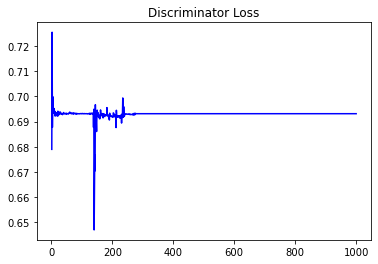

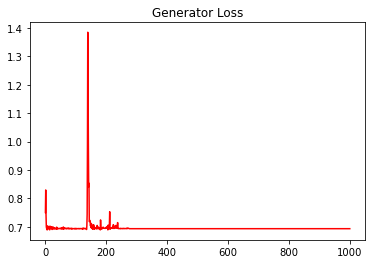

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.28493914364672757


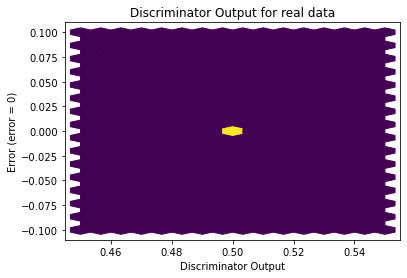

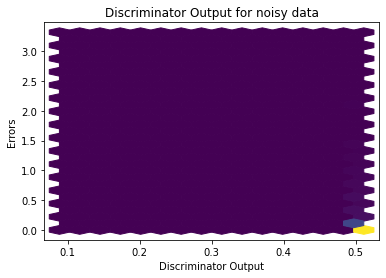

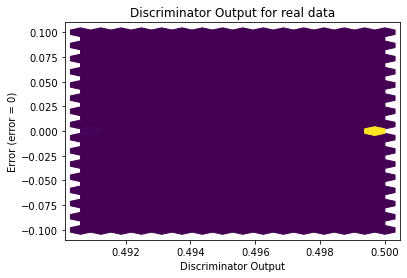

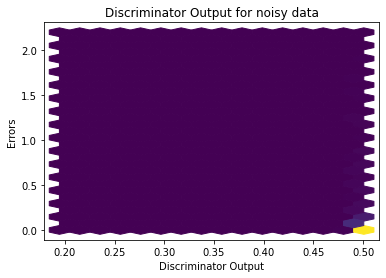

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

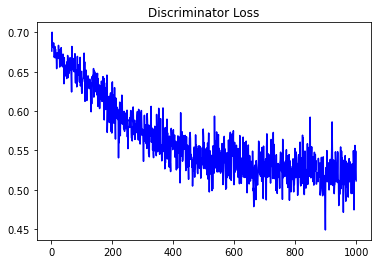

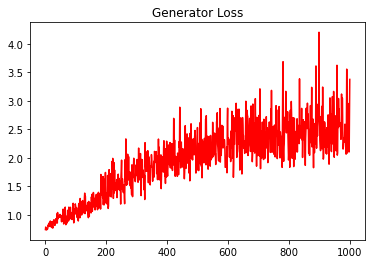

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.19809173038841096


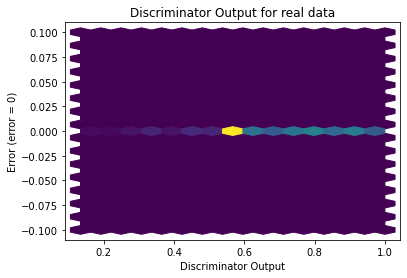

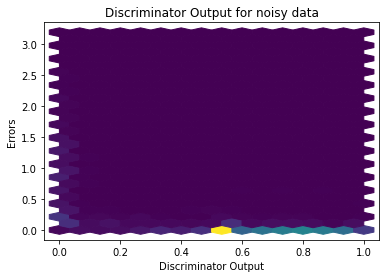

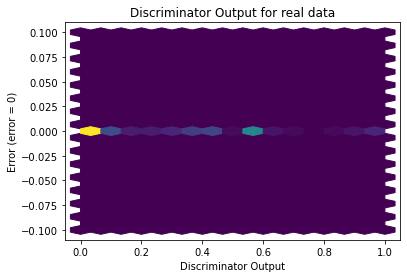

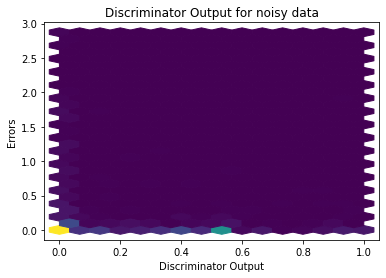

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


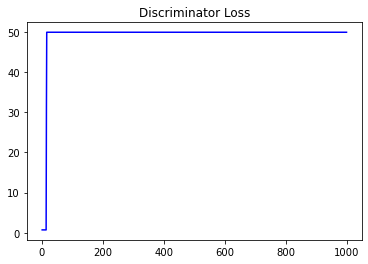

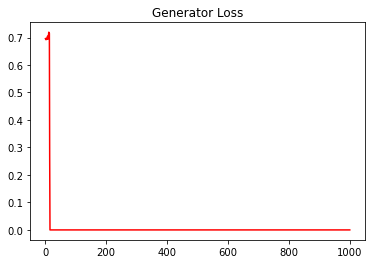

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
2303.4068145938413


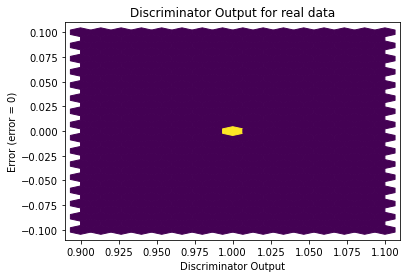

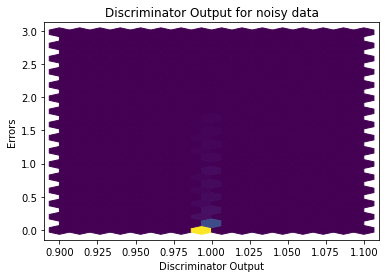

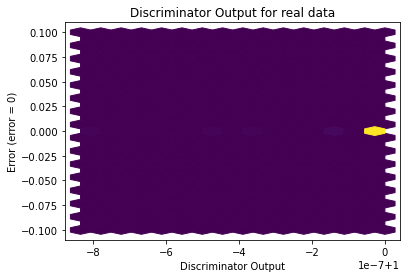

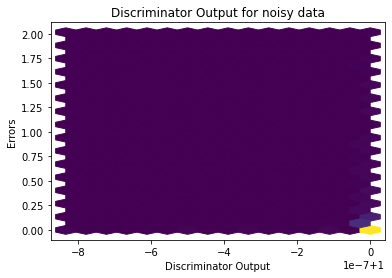

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


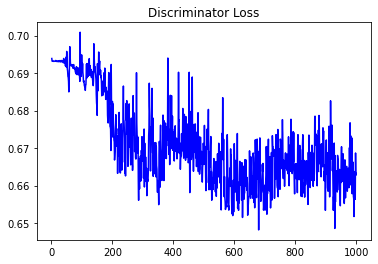

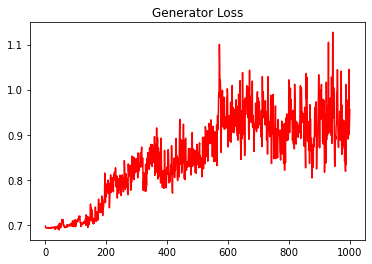

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2628174476937263


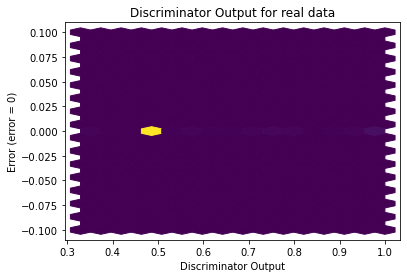

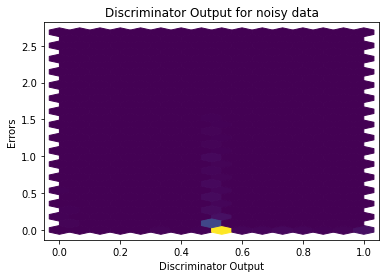

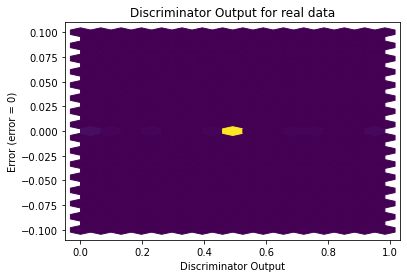

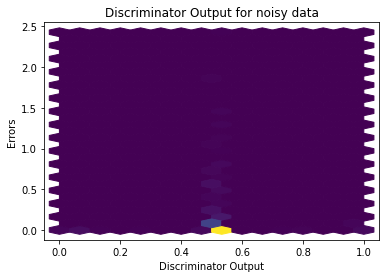

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1503]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3504]], requires_grad=True)
